Text(0.5, 0, 'u(x,t)')

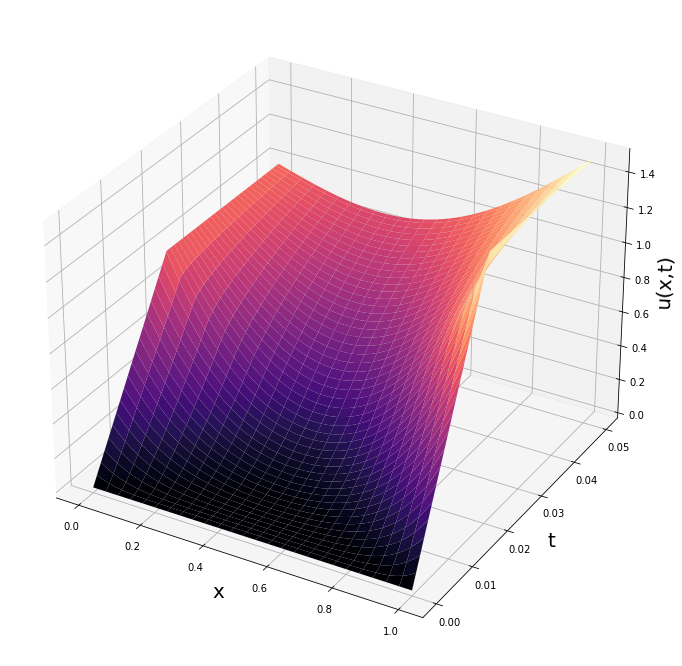

In [82]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact
from mpl_toolkits import mplot3d
from matplotlib import cm

D = 4
L = 1
M = 50
T = 0.05
N = 1000
#N = 992

tstar = .02

h = L/M  # spatial spacing
k = T/N  # time step

sigma = D*k/h**2

def f(x):
    return 0*x

def b(t):
    tstar = .02
    if t > tstar:
        t = tstar
    return 50*t

def l(t):
    return b(t)

def r(t):
    return 1.5*b(t)

x = np.linspace(0,L,M+1)
t = np.linspace(0,T,N+1)

w = f(x)  # approx to u(x,0)
wa = np.zeros((M+1,N+1))  # place to store values entire grid
wa[:,0] = w  

for j,_ in enumerate(t[:-1]):
    # update w
    w[1:-1] = w[1:-1] + sigma*( w[:-2] - 2*w[1:-1] + w[2:]  )
    newt = k*(j+1)
    w[0]  = l(newt)
    w[-1] = r(newt)
    wa[:,j+1] = w
    #if np.abs(w).max()> 10: break

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1, 1, 1, projection='3d')

(x,t) = np.meshgrid(x,t)

ax.plot_surface(x, t, wa.T, cmap=cm.magma, antialiased=True)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('t',fontsize=20)
ax.set_zlabel('u(x,t)',fontsize=20)